In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import numpy as np

# Cancer Inhibitors dataset
Following dataset is coming from https://www.kaggle.com/xiaotawkaggle/inhibitors

On Leho there is an adapted csv of the cdk2.h5 dataset. The adaptations I already did for you was extracting the data out of the .h5 file. Renaming the columns, add in the IDs of each of the compounds (row names) and combine it with the target into a .csv file.

For cdk2, 1890 potential inhibitors are collected from chembl database, in which molecules with IC50 lower than 10 uM are usually considered as inhibitors, otherwise non-inhibitors.

The rownames represent the CHEMBL Id, which can be used to search the CHEMBL database: https://www.ebi.ac.uk/chembl/

The features are split into 3 categories that represent three different sets of molecular fingerprints calculated by RDKIT. For more information: http://www.rdkit.org/docs/GettingStartedInPython.html#topological-fingerprints
* ap: Atom Pairs
* mg: Morgan Fingerprints (Circular Fingerprints)
* tt: Topological Torsions

The actual values represent if a molecular fingerprint is present in a specific molecule or not (1: present, 0: not present)

The target column indicated if the molecule is considered an inhibitor or not.

In [2]:
# Read in the data, because we have row names in our dataset, use pd.read_csv('filename.csv',index_col=0)
data=pd.read_csv("data/cdk2.csv",sep=",", index_col=0) # or index_col="Unamed: 0"
# Take a look at the first rows of the dataframe
data.head()

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,tt_2031,tt_2032,tt_2033,tt_2034,tt_2035,tt_2036,tt_2037,tt_2038,tt_2039,target
CHEMBL405042,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL258805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL318485,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
CHEMBL260417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
CHEMBL101557,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [3]:
# Take a look at the number of rows and columns in the dataframe
data.shape

(1890, 6118)

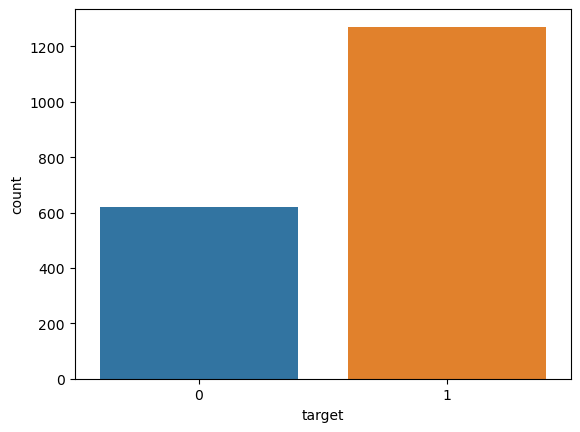

In [4]:
# Plot the counts of the target column using  a seaborn countplot
sns.countplot(data=data, x="target");

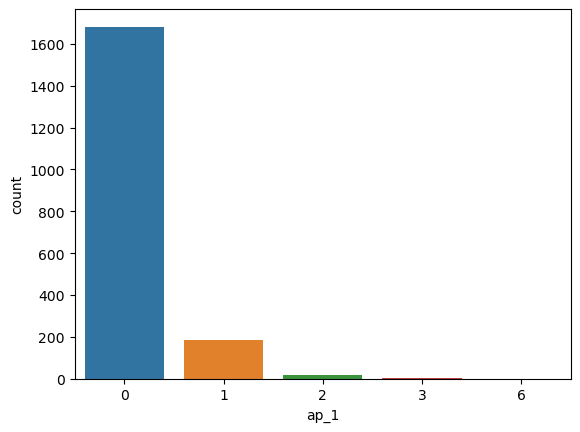

In [5]:
# Plot a countplot of the first feature column (ap_1)
sns.countplot(data=data,x="ap_1");

**What is noteworthy of the plot above?**



**Notes:**
Due to the amount of columns, a df.describe() will not show you a lot of information.

Pairplots and corrplots would be gigantic and also not very informative due to it being sparse data.

Removing outliers would not be a good idea, since a lot of the values that are different from 0 would already be considered outliers, whilst these are just the informative things.
    

In [6]:
# Split into features and targets
X=data.drop("target",axis=1) #-- > Features
y=data["target"] #-- > Targets

In [7]:
# Split into training and test set. Keep +-20% as a test_set
# Can leave the random_state of
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [8]:
X_train

,ap_1,ap_2,ap_3,ap_4,ap_5,ap_6,ap_7,ap_8,ap_9,ap_10,...,tt_2030,tt_2031,tt_2032,tt_2033,tt_2034,tt_2035,tt_2036,tt_2037,tt_2038,tt_2039
CHEMBL488955,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL3354189,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL101810,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
CHEMBL273061,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL487254,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CHEMBL2062575,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL294884,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL489432,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CHEMBL409619,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
%%time
# Create a multinomial naive bayes classifier
# too large may make it worse, can also go below zero but test the values to get the best
model = MultinomialNB(alpha=10)

# Fit the training data
# DO not need to scale since the data is represented by 0 and 1. 
model.fit(X_train,y_train)

# Show the score of the test data
#print("Train score:",model.score(X_train,y_train))
print("Test score:",model.score(X_test,y_test))
# Data not that good so check train data
print("Test score:",model.score(X_train,y_train))
# Practically the same so not overfitting

Test score: 0.7698412698412699
Test score: 0.8029100529100529
CPU times: user 325 ms, sys: 459 ms, total: 784 ms
Wall time: 564 ms


Predict the values for X_test: 
 [1 1 1 0 1 0 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1
 1 1 1 0 1 0 0 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0 1 0 1 1
 0 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 0
 0 1 1 0 0 0 1 1 1 1 1 0 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 0
 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 1 0
 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1
 1 1 1 0 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 1 0 0 1 1 0 0 0 1 1 1 0
 0 1 1 1 1 0 0 1 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 1 0 0 0
 1 0 0 1 1 1 1 0 1 0 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 0 1 0 1 0 1 1 0 0 0 0 0
 1 0 1 1 1 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 0 1
 1 1 0 1 1 0 1 1]

Confusion matrix 
 [[ 88  35]
 [ 52 203]]

Classification report 
               precision    recall  f1-score   support

           0       0.63      0.72      0.67       123
           1       0.8

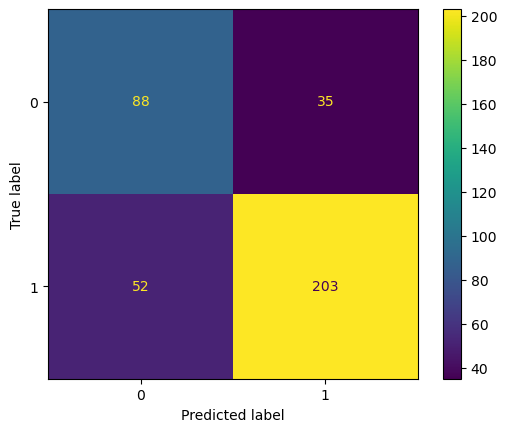

In [10]:
# Predict values for the test set
print("Predict the values for X_test: \n",model.predict(X_test))

# Print a confusion matrix and classification report
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

# Predict the X test set for the y targets
y_pred_test = model.predict(X_test)

print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_test))

print("\nClassification report \n",classification_report(y_test, y_pred_test))
print(model.classes_)
print("\nConfusion matrix \n",cf_test:= confusion_matrix(y_test,y_pred_test))  
matrix = ConfusionMatrixDisplay(cf_test) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

In [11]:
%%time
# Train a logistic regression model on the data and test it as you did for the naive bayes model
model=LogisticRegression(C=20, max_iter=10000) # penalty here is not required since default is l2
# Fit the model
model.fit(X_train,y_train)

print("Test Score",model.score(X_test, y_test))
print("Train Score",model.score(X_train, y_train))

Test Score 0.8544973544973545
Train Score 0.998015873015873
CPU times: user 47.3 s, sys: 55.9 s, total: 1min 43s
Wall time: 32.9 s



Confusion matrix 
 [[ 96  27]
 [ 28 227]]
              precision    recall  f1-score   support

           0       0.77      0.78      0.78       123
           1       0.89      0.89      0.89       255

    accuracy                           0.85       378
   macro avg       0.83      0.84      0.83       378
weighted avg       0.85      0.85      0.85       378

[[ 96  27]
 [ 28 227]]


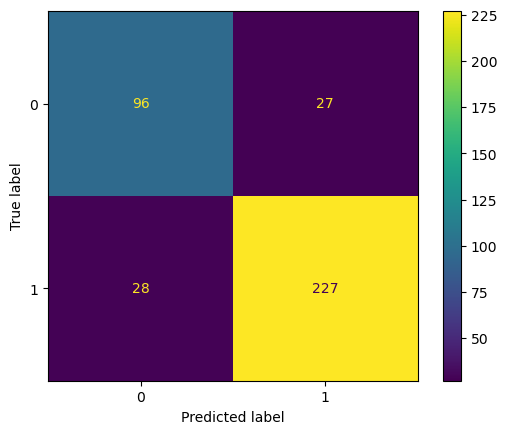

In [12]:
y_pred_test = model.predict(X_test)
print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_test))

print(classification_report(y_test, y_pred_test))

print(cf_test:= confusion_matrix(y_test,y_pred_test))  
matrix = ConfusionMatrixDisplay(cf_test) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()

Also try and play with the hyperparameters a bit

## Conclusion
**What can we conclude regarding the metrics of both models**


**What can we conclude regarding the time it takes to train the model?**



# MNIST dataset
MNIST is the "hello world" of AI.

MNIST is a dataset containing a lot of handwritten digits. The goal is to correctly identify the written digit from the image. There is a lot of different sets and subsets available online. The data that we will be using is coming from
https://www.kaggle.com/c/digit-recognizer/data

Each image contains 28x28 pixels => 784 values between 0 (black) and 255 (white)

Some initial code is given as to show you how to display the images

In [13]:
# Read in the dataset
df = pd.read_csv("data/MNIST.csv")

In [14]:
# Take a look at the first rows of the dataset
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot: xlabel='label', ylabel='count'>

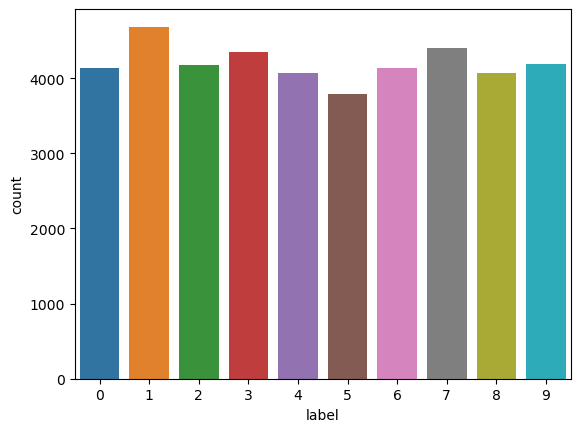

In [15]:
# Countplot of the numbers
sns.countplot(x="label",data=df)

In [16]:
# Split into features and targets
X = df.drop("label",axis=1)
y = df.label

Label: 7


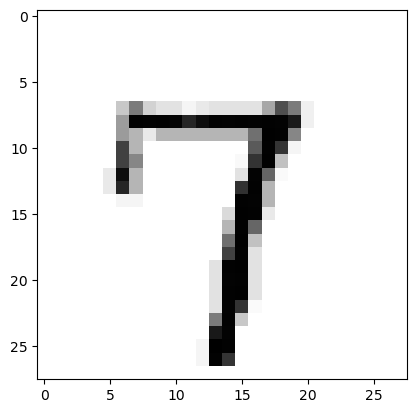

In [17]:
# Change this value to see another sample
row_num_X = 6

# Extract the image from X
single_image= X.iloc[row_num_X,:]  ## Row row_num_X, column all (:)

# Convert the single array of 784 pixels into nested arrays as to creat a 28x28 array
# [p0,p1,p2,p3,...,p784] becomes

# [[p0,p1,p2,p3,...,p27]
#  [p28,p29,p30,    ...]
#  ...
#  [          ..., p783]]
single_image_to_28x28 = single_image.values.reshape(28,28)

# Show the image
plt.imshow(single_image_to_28x28,cmap='Greys')
# Also print the corresponding label
print(f"Label: {y[row_num_X]}")

In [18]:
# Split into training and test set. Keep +-20% as a test_set
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [19]:
# Train a multinomial naive bayes model on the data and test it using the test data
# Create a multinomial naive bayes classifier
model = MultinomialNB(alpha=1)

# Fit the training data never train the test data. 
# DO not need to scale since the data is represented by 0 and 1. 
model.fit(X_train,y_train)

# Show the score of the test data
#print("Train score:",model.score(X_train,y_train))
print("Test score:",model.score(X_test,y_test))
print("Test score:",model.score(X_train,y_train))

Test score: 0.8275
Test score: 0.8265476190476191


In [20]:
# Predict values for the test set
print("Predictions?\n",model.predict(X_test))
print("Score without log function:\n",model.predict_proba(X_test))
print("Score with log function:\n",model.predict_log_proba(X_test))
# Print a confusion matrix and classification report
y_pred_test = model.predict(X_test)

print("\nClassification Report\n",classification_report(y_test, y_pred_test))

Predictions?
 [8 1 9 ... 3 0 9]
Score without log function:
 [[0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Score with log function:
 [[-22045.13328902  -1899.5451593   -4792.61179006 ... -18691.7305925
       0.         -11374.50699348]
 [-18985.43173198      0.          -9881.68844541 ... -11647.35810182
   -7273.62208912 -10113.57167678]
 [-30139.48904519 -25063.32098747 -25926.41882377 ...  -4239.01742057
   -9309.96780593      0.        ]
 ...
 [-18984.43640204 -35769.26877103 -13346.58618517 ... -36818.98587344
  -16714.18771274 -35238.32268079]
 [     0.         -75707.43649768 -21668.06225863 ... -27901.71378986
  -23191.59220012 -28413.95782211]
 [-22239.67097842 -29912.57568586 -11041.16074173 ...  -8459.94027304
   -6576.46436061      0.        ]]

Classification Report
               precision    recall  f1-score   support

           0       0.93      0.91      0.92

In [135]:
# Also try it using a logistic regression model
model=LogisticRegression(C=1, max_iter=10000) # penalty here is not required since default is l2
# Fit the model
model.fit(X_train,y_train)

print(model.score(X_test, y_test))

y_pred_test = model.predict(X_test)
print("\nConfusion matrix \n",confusion_matrix(y_test,y_pred_test))

print(classification_report(y_test, y_pred_test))
"""
print(cf_test:= confusion_matrix(y_test,y_pred_test))  
matrix = ConfusionMatrixDisplay(cf_test) # Without display_labels it will show class
                                                                         # numbers (0|1)
matrix.plot()
plt.show()
"""

0.8597883597883598

Confusion matrix 
 [[ 97  26]
 [ 27 228]]
              precision    recall  f1-score   support

           0       0.78      0.79      0.79       123
           1       0.90      0.89      0.90       255

    accuracy                           0.86       378
   macro avg       0.84      0.84      0.84       378
weighted avg       0.86      0.86      0.86       378



'\nprint(cf_test:= confusion_matrix(y_test,y_pred_test))  \nmatrix = ConfusionMatrixDisplay(cf_test) # Without display_labels it will show class\n                                                                         # numbers (0|1)\nmatrix.plot()\nplt.show()\n'

Following code let's you draw a number and predict it using your model

The model should be called 'model' or be renamed in the code below

Note that you need packages pillow and tkinter

`conda install pillow tk` or `pip3 install pillow tk` or `sudo dnf install python3-pillow python3-tkinter`

In [129]:
%pip install pillow==9.4.0

Note: you may need to restart the kernel to use updated packages.


In [137]:
from PIL import ImageTk, Image, ImageDraw
import PIL
from tkinter import *

width = 280  # canvas width
height = 280 # canvas height
center = height//2
white = (255) # canvas back

def predict():
    op2 = PIL.ImageChops.invert(output_image)
    op2=op2.resize((28,28),resample=3)
    # Show the image
    plt.imshow(op2,cmap='Greys')
    op2_array = np.asarray(op2).reshape(1,-1)
    print(model.predict(op2_array))
    
def clear():
    plt.close()
    canvas.delete("all")
    draw.rectangle((0,0,width,height),fill=255)
    
def paint(event):
    x1, y1 = (event.x - 1), (event.y - 1)
    x2, y2 = (event.x + 1), (event.y + 1)
    canvas.create_oval(x1, y1, x2, y2, fill="black",width=25)
    draw.line([x1, y1, x2, y2],fill="black",width=25)

master = Tk()

# create a tkinter canvas to draw on
canvas = Canvas(master, width=width, height=height, bg='white')
canvas.pack()

# create an empty PIL image and draw object to draw on
output_image = PIL.Image.new("L", (width, height), white)
draw = ImageDraw.Draw(output_image)
canvas.pack(expand=YES, fill=BOTH)
canvas.bind("<B1-Motion>", paint)

# add a button to save the image
button=Button(text="predict",command=predict)
button.pack()
button=Button(text="clear",command=clear)
button.pack()

master.mainloop()

/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
Exception in Tkinter callback
Traceback (most recent call last):
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/tkinter/__init__.py", line 1892, in __call__
    return self.func(*args)
  File "/tmp/ipykernel_3491/4288243161.py", line 16, in predict
    print(model.predict(op2_array))
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 419, in predict
    scores = self.decision_function(X)
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/linear_model/_base.py", line 400, in decision_function
    X = self._validate_data(X, accept_sparse="csr", reset=False)
  File "/home/guest/miniconda3/envs/bit07/lib/python3.9/site-packages/sklearn/base.py", line 569, in _validate_data
    self._check_n_features(